In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from matplotlib.patches import Patch

data_path="/Users/kaylinlee/Desktop/SS2020DataScience/Group Project/Data/"

# Load data sets
### WB % of women in natl parliaments data, EDGAR GHG, CO2 emission data

In [12]:
female_df=pd.read_excel(data_path+'Percentage_women_parliament_cleaned.xls')
CO2_df=pd.read_excel(data_path+'EDGARv5.0_FT2018_fossil_CO2_GHG_booklet2019.xls',
                     sheet_name='fossil_CO2_per_capita_by_countr') #data until 2018
GHG_df=pd.read_excel(data_path+'EDGARv5.0_FT2018_fossil_CO2_GHG_booklet2019.xls',
                     sheet_name='GHG_per_capita_by_country') #data until 2015

In [13]:
#create long form dfs 
female_df=female_df.melt(id_vars='Country Name',var_name='Year',
                         value_name='%Representation') #4393 rows × 3 columns
female_df.rename(columns={'Country Name':'country_name'},inplace=True)
CO2_df=CO2_df.melt(id_vars='country_name',var_name='Year',value_name='CO2_emissions') #unit: tCO2/cap/yr
GHG_df=GHG_df.melt(id_vars='country_name',var_name='Year',value_name='GHG_emissions') #unit: tCO2eq/cap/yr

In [14]:
#year in string to float
female_df['Year']=female_df['Year'].astype(float) 

In [15]:
#new comprehensive dataframes with columns: country, year, variables/ 1 for co2, 1 for GHG in long form 
female_CO2_df=pd.merge(female_df, CO2_df, on=['country_name','Year'], how='left')
female_GHG_df=pd.merge(female_df, GHG_df, on=['country_name','Year'], how='left')

In [16]:
#merge representation data with CO2 from 1997 to 2018/ with GHG from 1997 to 2015
female_CO2_df=female_CO2_df.loc[(female_CO2_df.Year>=(1997))&(female_CO2_df.Year<=(2018))]
female_GHG_df=female_GHG_df.loc[(female_GHG_df.Year>=(1997))&(female_GHG_df.Year<=(2015))]
###what to do with missing values from the emissions data?###

In [67]:
all_df=pd.merge(female_CO2_df, female_GHG_df,on=['country_name','Year','%Representation'], how='left')

In [68]:
#export as xls
female_CO2_df.to_excel(data_path+'female_rep_CO2_long_1997-2018.xls')
female_GHG_df.to_excel(data_path+'female_rep_GHG_long_1997-2015.xls')
all_df.to_excel(data_path+'All_1997-2015.xls')

# Scatter plots (temporal evolution of both variables)
## 3 total: 1 representation/1CO2/1GHG

In [3]:
female_CO2_df=pd.read_excel(data_path+'female_rep_CO2_long_1997-2018.xls')
female_GHG_df=pd.read_excel(data_path+'female_rep_GHG_long_1997-2015.xls')
all_df=pd.read_excel(data_path+'All_1997-2015.xls')

In [43]:
female_CO2_df['Year']=female_CO2_df['Year'].astype(int)

Text(0.5, 0.98, 'Temporal evolution of \nfemale representation in parliaments')

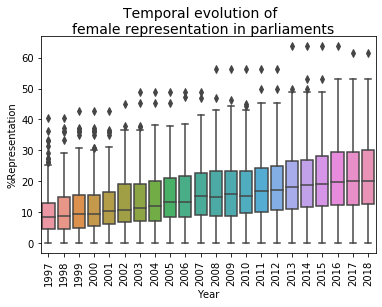

In [46]:
#scatterplot doesn't make sense since it just stack up dots over one point on x-axis
#general trend of % representation increasing over time 
sns.boxplot(x='Year',y='%Representation', data=female_CO2_df)
plt.xticks(rotation='vertical')
plt.suptitle('Temporal evolution of \nfemale representation in parliaments', fontsize=14)

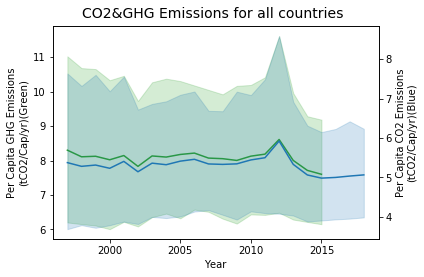

In [85]:
#all emissions global
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1=sns.lineplot(x='Year',y='GHG_emissions',
                 data=all_df, color=color)
ax1.set_xlabel('Year')
ax1.set_ylabel('Per Capita GHG Emissions\n(tCO2/Cap/yr)(Green)')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2=sns.lineplot(x='Year',y='CO2_emissions', data=all_df, color=color)
ax2.set_ylabel('Per Capita CO2 Emissions\n(tCO2/Cap/yr)(Blue)')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
# why doesn't this work??
# labels=ax1.get_xticklabels()
# ax1.set_xticklabels(labels, rotation=90)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
fig.suptitle('CO2&GHG Emissions for all countries', fontsize=14)
plt.show()

Text(0.5, 0.98, 'Temporal evolution of GHG emissions')

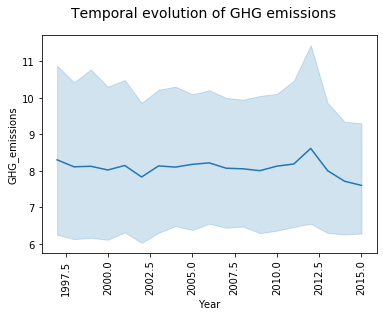

In [51]:
#general trend of emissions increasing over time 
sns.lineplot(x='Year',y='GHG_emissions', data=female_GHG_df)
plt.xticks(rotation='vertical')
plt.suptitle('Temporal evolution of GHG emissions', fontsize=14)

Text(0.5, 0, 'Female Representation in Parliament (%)')

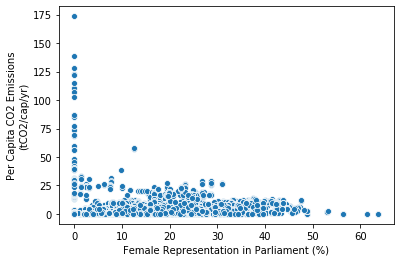

In [88]:
#no significant trend btwn %representation and CO2 emissions
sns.scatterplot(x='%Representation',y='CO2_emissions', data=female_CO2_df)
plt.ylabel('Per Capita CO2 Emissions\n(tCO2/cap/yr)')
plt.xlabel('Female Representation in Parliament (%)')

Text(0.5, 0, 'Female Representation in Parliament (%)')

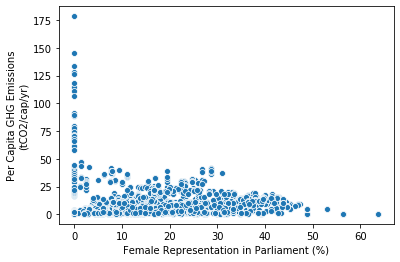

In [89]:
#no significant trend btwn %representation and GHG emissions
sns.scatterplot(x='%Representation',y='GHG_emissions', data=female_GHG_df)
plt.ylabel('Per Capita GHG Emissions\n(tCO2/cap/yr)')
plt.xlabel('Female Representation in Parliament (%)')

# Country Grouping
## Thresholds: >=35% (high), 35%>  >=20% (mid), 20%>  >=0%


In [120]:
recent_df=all_df.loc[all_df.Year==2018]
group_high=recent_df[recent_df['%Representation']>= 35]
#print(group_high.country_name.unique())
group_mid=recent_df[(recent_df['%Representation']<35) & (recent_df['%Representation']>=20)]
#print(group_mid.country_name.unique())
group_low=recent_df[(recent_df['%Representation']<20) & (recent_df['%Representation']>=0)]
#print(group_low.country_name.unique())

def group_by_rep_level_CO2(df):
    df['Grouping']=''
    for country in df.country_name.unique():
        country_mask= df.country_name==country
        if country in group_high.country_name.unique():
            df.loc[country_mask, 'Grouping'] = 'High'
        elif country in group_mid.country_name.unique():
            df.loc[country_mask, 'Grouping'] = 'Mid'
        else:
            df.loc[country_mask, 'Grouping'] = 'Low'
    return df

In [126]:
female_CO2_df_grouped=group_by_rep_level_CO2(female_CO2_df)
female_CO2_df_grouped

,country_name,Year,%Representation,CO2_emissions,Grouping
0,Afghanistan,1997,NaN,0.062539,Mid
1,Angola,1997,9.5,1.093252,Mid
2,Albania,1997,NaN,0.526220,Mid
3,Andorra,1997,7.1,NaN,Mid
4,United Arab Emirates,1997,0.0,31.255387,Mid
...,...,...,...,...,...
4197,Samoa,2018,10.0,0.673631,Low
4198,"Yemen, Rep.",2018,0.0,NaN,Low
4199,South Africa,2018,42.3,8.314655,High
4200,Zambia,2018,18.0,0.293235,Low


In [127]:
recent_df=all_df.loc[all_df.Year==2015]
group_high=recent_df[recent_df['%Representation']>= 35]
#print(group_high.country_name.unique())
group_mid=recent_df[(recent_df['%Representation']<35) & (recent_df['%Representation']>=20)]
#print(group_mid.country_name.unique())
group_low=recent_df[(recent_df['%Representation']<20) & (recent_df['%Representation']>=0)]
#print(group_low.country_name.unique())

def group_by_rep_level_GHG(df):
    df['Grouping']=''
    for country in df.country_name.unique():
        country_mask= df.country_name==country
        if country in group_high.country_name.unique():
            df.loc[country_mask, 'Grouping'] = 'High'
        elif country in group_mid.country_name.unique():
            df.loc[country_mask, 'Grouping'] = 'Mid'
        else:
            df.loc[country_mask, 'Grouping'] = 'Low'
    return df

In [128]:
female_GHG_df_grouped=group_by_rep_level_GHG(female_GHG_df)
female_GHG_df_grouped

,country_name,Year,%Representation,GHG_emissions,Grouping
0,Afghanistan,1997,NaN,0.810501,Mid
1,Angola,1997,9.5,4.398505,High
2,Albania,1997,NaN,1.824226,Mid
3,Andorra,1997,7.1,NaN,High
4,United Arab Emirates,1997,0.0,42.595482,Mid
...,...,...,...,...,...
3624,Samoa,2015,6.1,1.852755,Low
3625,"Yemen, Rep.",2015,0.0,NaN,Low
3626,South Africa,2015,42.0,10.516513,High
3627,Zambia,2015,12.7,1.465929,Low


In [149]:
female_CO2_df_grouped.to_excel(data_path+'female_CO2_df_grouped.xls')
female_GHG_df_grouped.to_excel(data_path+'female_GHG_df_grouped.xls')

Text(0.5, 0, 'Female Representation in Parliament (%)')

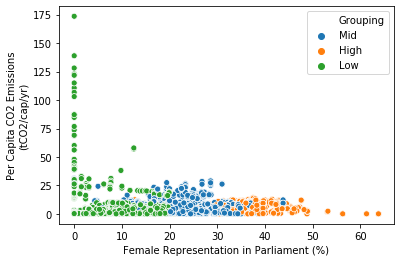

In [129]:
#plots with hue - CO2 emissions
sns.scatterplot(x='%Representation',y='CO2_emissions', data=female_CO2_df, hue='Grouping')
plt.ylabel('Per Capita CO2 Emissions\n(tCO2/cap/yr)')
plt.xlabel('Female Representation in Parliament (%)')

Text(0.5, 0, 'Female Representation in Parliament (%)')

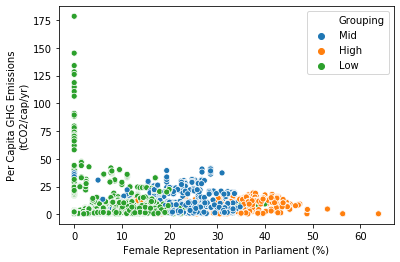

In [130]:
#plots with hue - GHG emissions
sns.scatterplot(x='%Representation',y='GHG_emissions', data=female_GHG_df, hue='Grouping')
plt.ylabel('Per Capita GHG Emissions\n(tCO2/cap/yr)')
plt.xlabel('Female Representation in Parliament (%)')

Text(0.5, 0.98, 'High Representation Group')

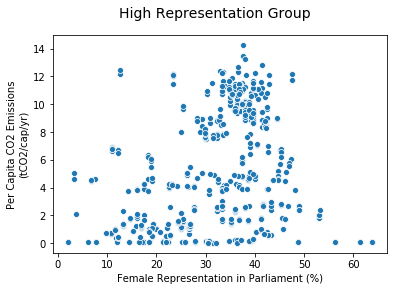

In [146]:
#high - CO2
high_df=female_CO2_df.loc[female_CO2_df.Grouping==('High')]
sns.scatterplot(x='%Representation',y='CO2_emissions', data=high_df)
plt.ylabel('Per Capita CO2 Emissions\n(tCO2/cap/yr)')
plt.xlabel('Female Representation in Parliament (%)')
plt.suptitle('High Representation Group', fontsize=14)

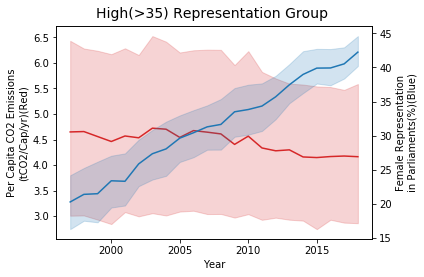

In [140]:
#high - CO2
high_df=female_CO2_df.loc[female_CO2_df.Grouping==('High')]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1=sns.lineplot(x='Year',y='CO2_emissions',
                 data=high_df, color=color)
ax1.set_xlabel('Year')
ax1.set_ylabel('Per Capita CO2 Emissions\n(tCO2/Cap/yr)(Red)')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2=sns.lineplot(x='Year',y='%Representation', 
                 data=high_df, color=color)
ax2.set_ylabel('Female Representation\nin Parliaments(%)(Blue)')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
# why doesn't this work??
# labels=ax1.get_xticklabels()
# ax1.set_xticklabels(labels, rotation=90)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
fig.suptitle('High(>35) Representation Group', fontsize=14)
plt.show()

Text(0.5, 0.98, 'Mid-level Representation Group')

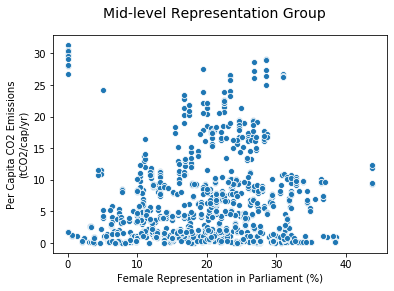

In [147]:
#mid - CO2
mid_df=female_CO2_df.loc[female_CO2_df.Grouping==('Mid')]
sns.scatterplot(x='%Representation',y='CO2_emissions', data=mid_df)
plt.ylabel('Per Capita CO2 Emissions\n(tCO2/cap/yr)')
plt.xlabel('Female Representation in Parliament (%)')
plt.suptitle('Mid-level Representation Group', fontsize=14)

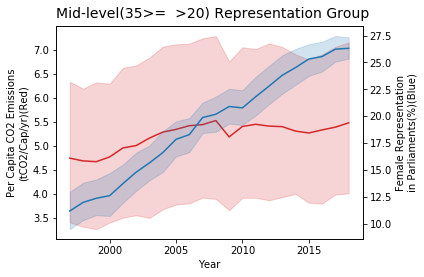

In [141]:
mid_df=female_CO2_df.loc[female_CO2_df.Grouping==('Mid')]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1=sns.lineplot(x='Year',y='CO2_emissions',
                 data=mid_df, color=color)
ax1.set_xlabel('Year')
ax1.set_ylabel('Per Capita CO2 Emissions\n(tCO2/Cap/yr)(Red)')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2=sns.lineplot(x='Year',y='%Representation', 
                 data=mid_df, color=color)
ax2.set_ylabel('Female Representation\nin Parliaments(%)(Blue)')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
# why doesn't this work??
# labels=ax1.get_xticklabels()
# ax1.set_xticklabels(labels, rotation=90)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
fig.suptitle('Mid-level(35>=  >20) Representation Group', fontsize=14)
plt.show()

Text(0.5, 0.98, 'Low Representation Group')

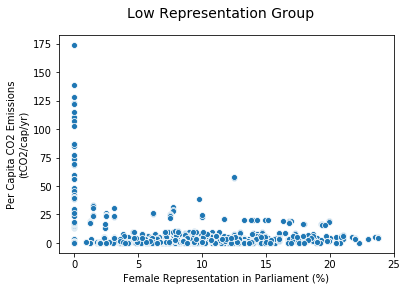

In [148]:
#low - CO2
low_df=female_CO2_df.loc[female_CO2_df.Grouping==('Low')]
sns.scatterplot(x='%Representation',y='CO2_emissions', data=low_df)
plt.ylabel('Per Capita CO2 Emissions\n(tCO2/cap/yr)')
plt.xlabel('Female Representation in Parliament (%)')
plt.suptitle('Low Representation Group', fontsize=14)

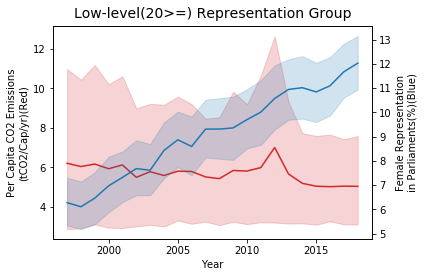

In [143]:
low_df=female_CO2_df.loc[female_CO2_df.Grouping==('Low')]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1=sns.lineplot(x='Year',y='CO2_emissions',
                 data=low_df, color=color)
ax1.set_xlabel('Year')
ax1.set_ylabel('Per Capita CO2 Emissions\n(tCO2/Cap/yr)(Red)')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2=sns.lineplot(x='Year',y='%Representation', 
                 data=low_df, color=color)
ax2.set_ylabel('Female Representation\nin Parliaments(%)(Blue)')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
# why doesn't this work??
# labels=ax1.get_xticklabels()
# ax1.set_xticklabels(labels, rotation=90)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
fig.suptitle('Low-level(20>=) Representation Group', fontsize=14)
plt.show()

# Plots for each individual countries
### high representation: Rwanda & Sweden/ low representation: Japan & Nigeria 
### high emissions: Qatar & USA/ low emissions: Zimbabwe & India
#### (based on the most recent data from 2019? - needs to be adjusted to different time periods of the data sets)

In [154]:
high_df.loc[high_df.Year == (2018)
           ].sort_values(by=['%Representation'], ascending=False
                        ).head(5)

,country_name,Year,%Representation,CO2_emissions,Grouping
4156,Rwanda,2018,61.3,0.089410,High
4050,Cuba,2018,53.2,2.397879,High
4033,Bolivia,2018,53.1,2.033808,High
4120,Mexico,2018,48.2,3.791534,High
4078,Grenada,2018,46.7,2.656473,High


In [155]:
high_df.loc[high_df.Year == (2015)
           ].sort_values(by=['%Representation'], ascending=False
                        ).head(5)

,country_name,Year,%Representation,CO2_emissions,Grouping
3583,Rwanda,2015,63.8,0.082034,High
3460,Bolivia,2015,53.1,1.833644,High
3477,Cuba,2015,48.9,2.704187,High
3599,Sweden,2015,43.6,4.524978,High
3586,Senegal,2015,42.7,0.559772,High


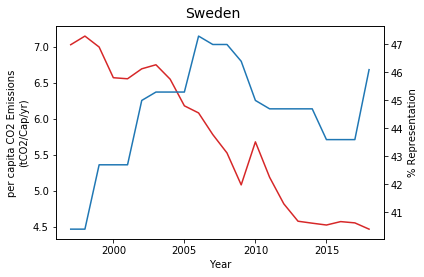

In [157]:
#Sweden -high representation
SWD_df=female_CO2_df.loc[female_CO2_df.country_name==('Sweden')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=SWD_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=SWD_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
plt.suptitle('Sweden', fontsize=14)
plt.show()

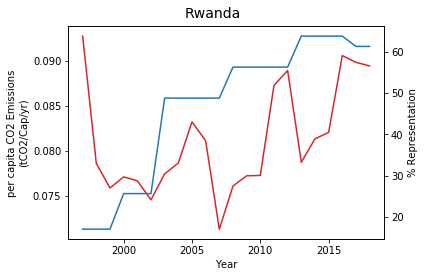

In [158]:
#Rwanda - high representation
RWD_df=female_CO2_df.loc[female_CO2_df.country_name==('Rwanda')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=RWD_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=RWD_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
plt.suptitle('Rwanda', fontsize=14)
plt.show()

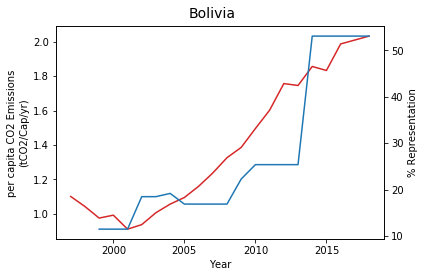

In [159]:
#Bolivia - high representation
BLV_df=female_CO2_df.loc[female_CO2_df.country_name==('Bolivia')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=BLV_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=BLV_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
plt.suptitle('Bolivia', fontsize=14)
plt.show()

In [165]:
low_df.loc[low_df.Year == (2018)
           ].sort_values(by=['%Representation'], ascending=True
                        ).head(15)

,country_name,Year,%Representation,CO2_emissions,Grouping
4196,Vanuatu,2018,0.0,0.292363,Low
4198,"Yemen, Rep.",2018,0.0,NaN,Low
4148,Papua New Guinea,2018,0.0,0.465706,Low
4068,"Micronesia, Fed. Sts.",2018,0.0,NaN,Low
4142,Oman,2018,1.2,17.642023,Low
4083,Haiti,2018,2.5,0.328473,Low
4103,Kuwait,2018,3.1,23.907287,Low
4161,Solomon Islands,2018,4.0,0.213464,Low
4105,Lebanon,2018,4.7,4.200097,Low
4178,Thailand,2018,5.3,4.062271,Low


In [166]:
low_df.loc[low_df.Year == (2015)
           ].sort_values(by=['%Representation'], ascending=True
                        ).head(20)

,country_name,Year,%Representation,CO2_emissions,Grouping
3609,Tonga,2015,0.0,1.081539,Low
3580,Qatar,2015,0.0,39.424750,Low
3625,"Yemen, Rep.",2015,0.0,NaN,Low
3574,Palau,2015,0.0,56.143870,Low
3495,"Micronesia, Fed. Sts.",2015,0.0,NaN,Low
3623,Vanuatu,2015,0.0,0.293327,Low
3569,Oman,2015,1.2,18.761737,Low
3530,Kuwait,2015,1.5,24.268533,Low
3588,Solomon Islands,2015,2.0,0.213459,Low
3575,Papua New Guinea,2015,2.7,0.466881,Low


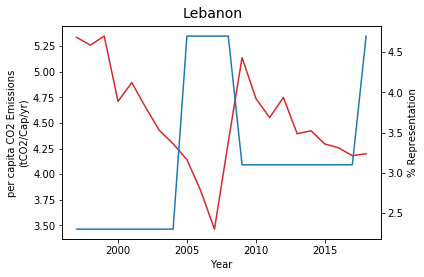

In [167]:
#Lebanon - low representation
LBN_df=female_CO2_df.loc[female_CO2_df.country_name==('Lebanon')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=LBN_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=LBN_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
plt.suptitle('Lebanon', fontsize=14)
plt.show()

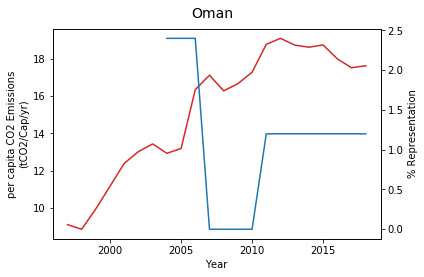

In [168]:
#Oman - low representation

OMN_df=female_CO2_df.loc[female_CO2_df.country_name==('Oman')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=OMN_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=OMN_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
plt.suptitle('Oman', fontsize=14)
plt.show()

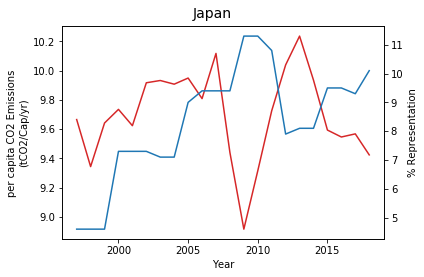

In [160]:
#Japan - low representation
JPN_df=female_CO2_df.loc[female_CO2_df.country_name==('Japan')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=JPN_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=JPN_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
plt.suptitle('Japan', fontsize=14)
plt.show()

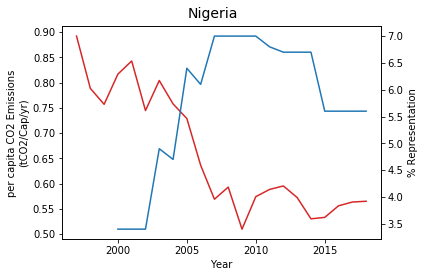

In [169]:
#Nigeria - low representation
NGR_df=female_CO2_df.loc[female_CO2_df.country_name==('Nigeria')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=NGR_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=NGR_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
plt.suptitle('Nigeria', fontsize=14)
plt.show()

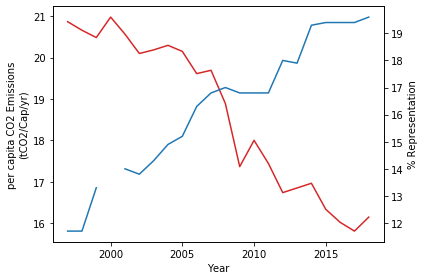

In [96]:
#USA - high emissions
USA_df=female_CO2_df.loc[female_CO2_df.country_name==('United States')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=USA_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=USA_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

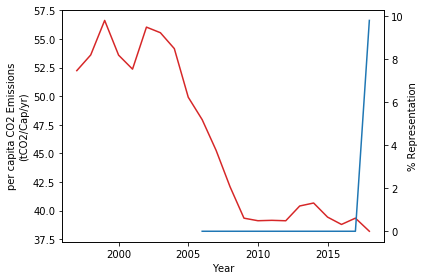

In [97]:
#Qatar - high emissions
QTR_df=female_CO2_df.loc[female_CO2_df.country_name==('Qatar')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=QTR_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=QTR_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

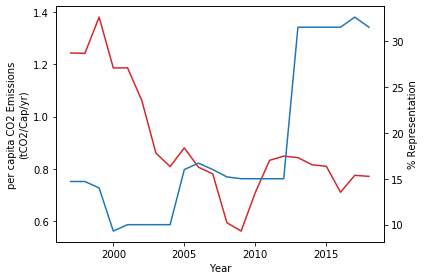

In [98]:
#Zimbabwe - low emissions
ZBW_df=female_CO2_df.loc[female_CO2_df.country_name==('Zimbabwe')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=ZBW_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=ZBW_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

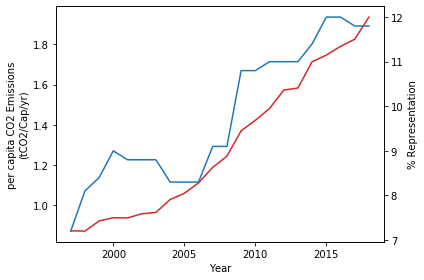

In [99]:
#India - low emissions
IND_df=female_CO2_df.loc[female_CO2_df.country_name==('India')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=IND_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=IND_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Avg representation countries 
## CO2 Emissions

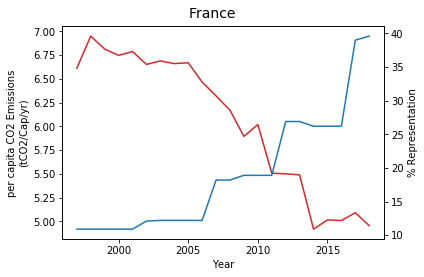

In [28]:
#France - avg representation
FRA_df=female_CO2_df.loc[female_CO2_df.country_name==('France')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=FRA_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=FRA_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
fig.suptitle('France', fontsize=14)
plt.show()

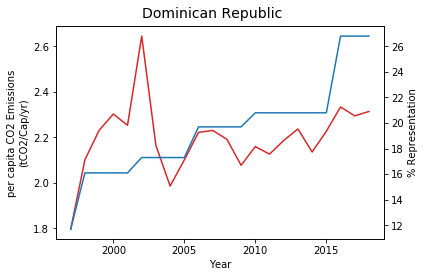

In [29]:
#DOR - avg representation
DOR_df=female_CO2_df.loc[female_CO2_df.country_name==('Dominican Republic')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=DOR_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=DOR_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
fig.suptitle('Dominican Republic', fontsize=14)
plt.show()

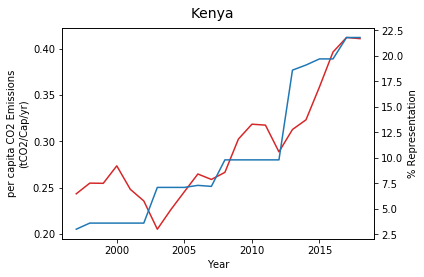

In [30]:
#Kenya - avg representation
KNY_df=female_CO2_df.loc[female_CO2_df.country_name==('Kenya')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=KNY_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=KNY_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
fig.suptitle('Kenya', fontsize=14)
plt.show()

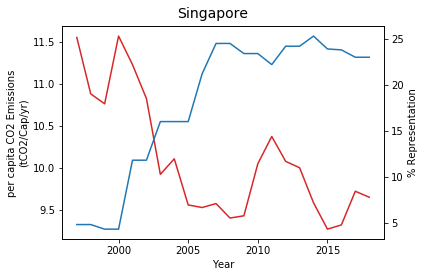

In [31]:
#Singapore - avg representation
SGP_df=female_CO2_df.loc[female_CO2_df.country_name==('Singapore')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','CO2_emissions',data=SGP_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=SGP_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
fig.suptitle('Singapore', fontsize=14)
plt.show()

# Avg representation countries 
## GHG Emissions

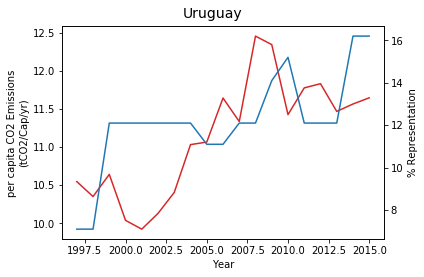

In [32]:
#Uruguay - avg rep
URU_df=female_GHG_df.loc[female_GHG_df.country_name==('Uruguay')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','GHG_emissions',data=URU_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=URU_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
fig.suptitle('Uruguay', fontsize=14)
plt.show()

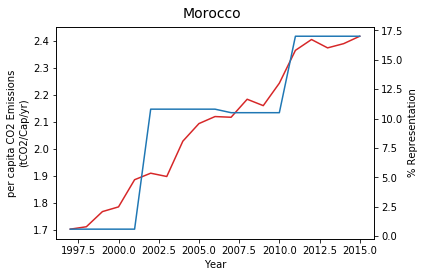

In [34]:
#Morocco - avg rep
MOR_df=female_GHG_df.loc[female_GHG_df.country_name==('Morocco')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','GHG_emissions',data=MOR_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=MOR_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
fig.suptitle('Morocco', fontsize=14)
plt.show()

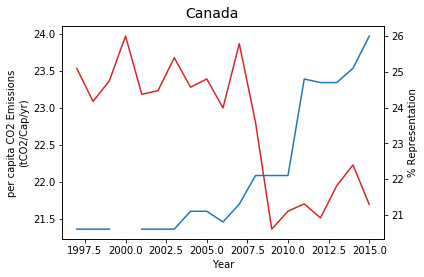

In [35]:
#Morocco - avg rep
CAN_df=female_GHG_df.loc[female_GHG_df.country_name==('Canada')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','GHG_emissions',data=CAN_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=CAN_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
fig.suptitle('Canada', fontsize=14)
plt.show()

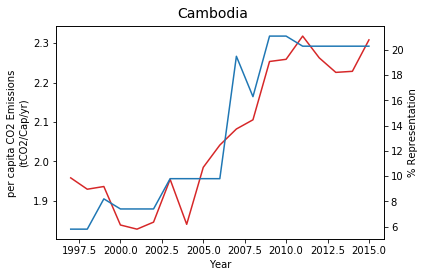

In [36]:
#Morocco - avg rep
CAM_df=female_GHG_df.loc[female_GHG_df.country_name==('Cambodia')]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('per capita CO2 Emissions\n(tCO2/Cap/yr)')
ax1.plot('Year','GHG_emissions',data=CAM_df, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% Representation')  # we already handled the x-label with ax1
ax2.plot('Year','%Representation',data=CAM_df, color=color)
ax2.tick_params(axis='y')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
fig.suptitle('Cambodia', fontsize=14)
plt.show()